In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f'Training data shape: {train.shape}')
print(f'Test data shape: {test.shape}')

Training data shape: (16061, 785)
Test data shape: (17230, 784)


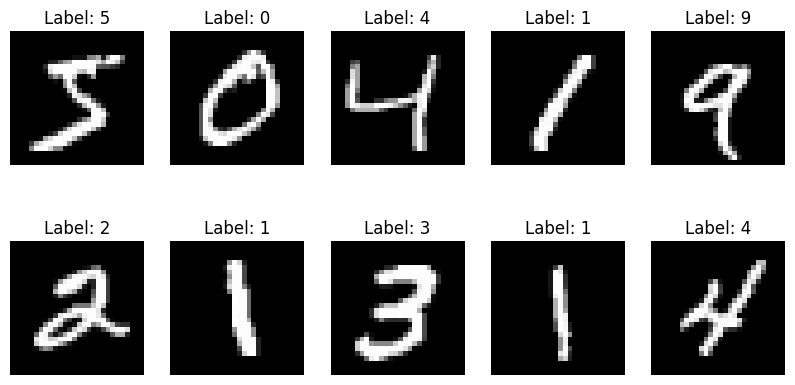

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



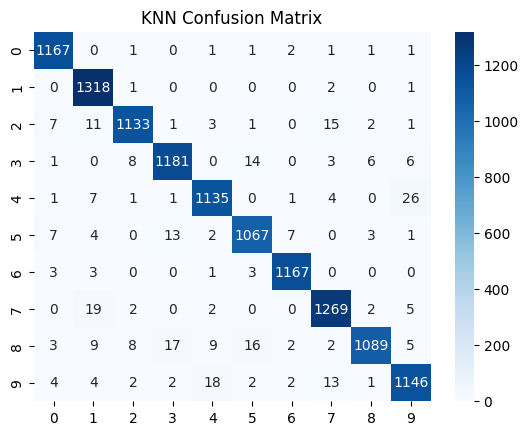

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9664
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.94      1.00      0.97      1322
           2       0.98      0.95      0.97      1174
           3       0.96      0.96      0.96      1219
           4       0.97      0.96      0.97      1176
           5       0.96      0.97      0.96      1104
           6       0.98      0.99      0.99      1177
           7       0.96      0.97      0.96      1299
           8       0.99      0.91      0.95      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



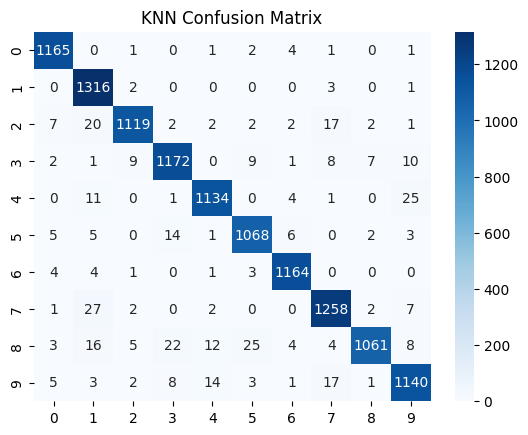

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9573
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1175
           1       0.91      0.99      0.95      1322
           2       0.98      0.93      0.95      1174
           3       0.96      0.95      0.95      1219
           4       0.97      0.95      0.96      1176
           5       0.95      0.96      0.95      1104
           6       0.98      0.98      0.98      1177
           7       0.95      0.96      0.95      1299
           8       0.98      0.90      0.94      1160
           9       0.94      0.95      0.94      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



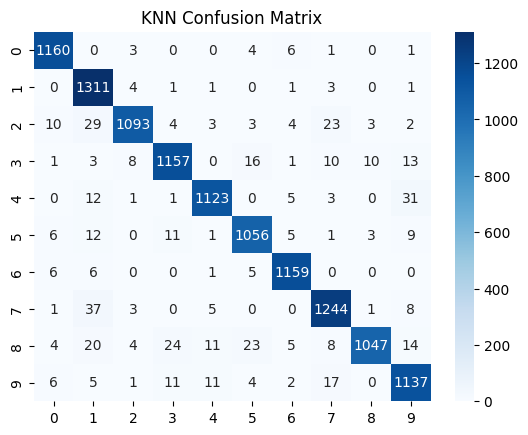

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
# In KNN as neighbours increases there is slight decrease in accuracy metric

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



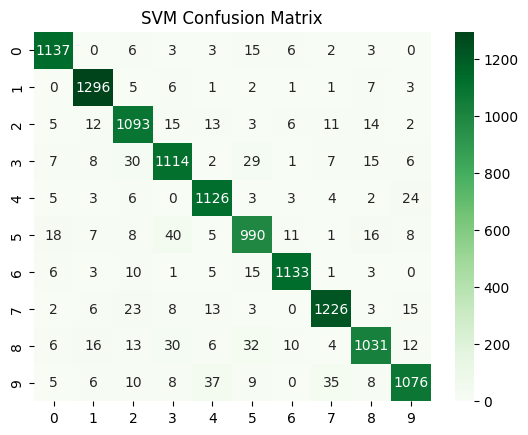

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



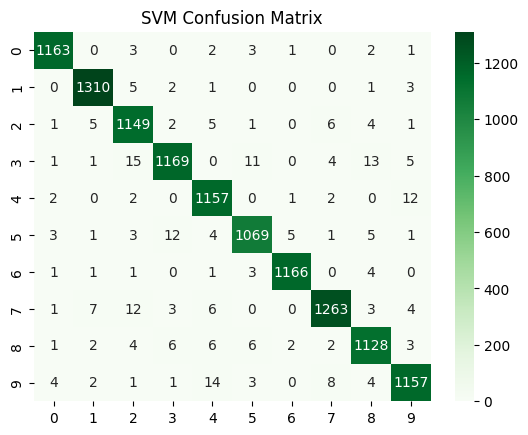

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1175
           1       0.98      0.99      0.98      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.96      0.98      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.98      0.96      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



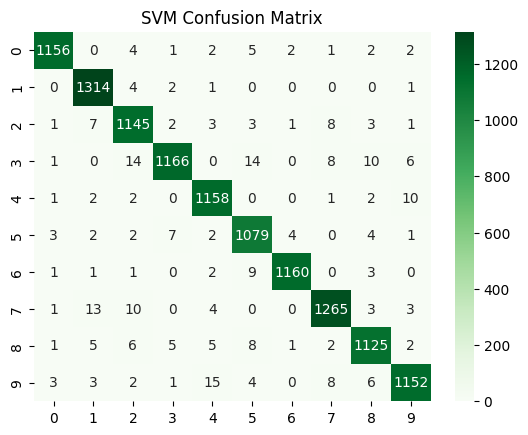

In [ ]:
svm_model = SVC(kernel='poly')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.7765
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1175
           1       0.86      0.93      0.89      1322
           2       0.73      0.75      0.74      1174
           3       0.80      0.71      0.75      1219
           4       0.79      0.85      0.82      1176
           5       0.59      0.63      0.61      1104
           6       0.86      0.82      0.84      1177
           7       0.88      0.81      0.84      1299
           8       0.66      0.69      0.68      1160
           9       0.78      0.69      0.73      1194

    accuracy                           0.78     12000
   macro avg       0.78      0.77      0.77     12000
weighted avg       0.78      0.78      0.78     12000



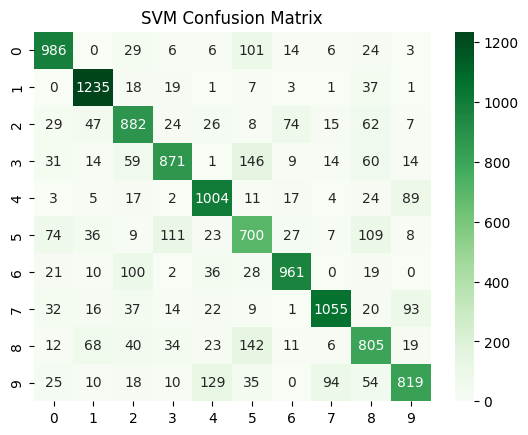

In [ ]:
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
# In all these observations RBF kernel gives the best accuracy (among linear,rbf,polynomial and sigmoid kernels)

Decision Tree Validation Accuracy: 0.8678
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1175
           1       0.93      0.96      0.95      1322
           2       0.86      0.86      0.86      1174
           3       0.86      0.83      0.84      1219
           4       0.85      0.88      0.86      1176
           5       0.82      0.81      0.82      1104
           6       0.90      0.89      0.89      1177
           7       0.91      0.90      0.91      1299
           8       0.79      0.79      0.79      1160
           9       0.83      0.83      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



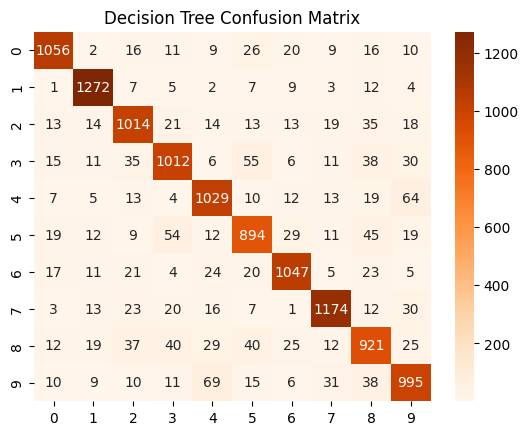

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split, y_train_split)
y_val_pred_dt = dt_model.predict(X_val)
dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')
print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)
y_val_pred_rf = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Validation Accuracy: {rf_acc:.4f}')

Random Forest Validation Accuracy: 0.9693


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)
xgb_model.fit(X_train_split, y_train_split)
y_val_pred_xgb = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, y_val_pred_xgb)
print(f'XGBoost Validation Accuracy: {xgb_acc:.4f}')

XGBoost Validation Accuracy: 0.9770
